# 北京联合大学录取分数可视化

In [2]:
import requests
import pprint
from bs4 import BeautifulSoup
import pandas as pd
count = 0
allitem = []
for page_number in range(1,324):
    url = f"http://127.0.0.1:5000/data2?page={page_number}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table')
    rows = table.find_all('tr')
    #print(rows)
    for row in rows:
        cols = row.find_all('td')
        if (len(cols) > 0):
            allitem.append([col.text for col in cols])
            count += 1
print(len(allitem))
pprint. pprint(allitem)
#print(count)
#df = pd.DataFrame(allitem)
#print(df.dtypes)
#print(df)

6443
[['2023年', '安徽', '本科', '本科二批', '理工', '大数据管理与应用', '502', '490', '497', '93047'],
 ['2023年', '安徽', '本科', '本科二批', '理工', '电气工程及其自动化', '498', '485', '492', '98435'],
 ['2023年',
  '安徽',
  '本科',
  '本科二批',
  '理工',
  '电气工程及其自动化（中外合作办学）',
  '489',
  '480',
  '484',
  '103831'],
 ['2023年', '安徽', '本科', '本科二批', '理工', '电子商务', '501', '501', '501', '82259'],
 ['2023年', '安徽', '本科', '本科二批', '理工', '法学', '517', '496', '505', '87128'],
 ['2023年',
  '安徽',
  '本科',
  '本科二批',
  '理工',
  '轨道交通信号与控制（中外合作办学）',
  '480',
  '472',
  '474',
  '112822'],
 ['2023年', '安徽', '本科', '本科二批', '理工', '会计学', '520', '509', '515', '74840'],
 ['2023年', '安徽', '本科', '本科二批', '理工', '交通工程', '489', '489', '489', '94098'],
 ['2023年',
  '安徽',
  '本科',
  '本科二批',
  '理工',
  '交通工程（中外合作办学）',
  '486',
  '471',
  '475',
  '113945'],
 ['2023年', '安徽', '本科', '本科二批', '理工', '人工智能', '496', '486', '492', '97343'],
 ['2023年',
  '安徽',
  '本科',
  '本科二批',
  '理工',
  '物流工程（中外合作办学）',
  '474',
  '469',
  '471',
  '116181'],
 ['2023年', '安徽', '本科', '本科二批', '理工'

## 利用pandas模块实现数据的分析处理

In [3]:
import pandas as pd
df = pd.DataFrame(allitem)
csv_file_path = 'output_2.csv'
df.to_csv(csv_file_path ,index=False,header=0)
df

,0,1,2,3,4,5,6,7,8,9
0,2023年,安徽,本科,本科二批,理工,大数据管理与应用,502,490,497,93047
1,2023年,安徽,本科,本科二批,理工,电气工程及其自动化,498,485,492,98435
2,2023年,安徽,本科,本科二批,理工,电气工程及其自动化（中外合作办学）,489,480,484,103831
3,2023年,安徽,本科,本科二批,理工,电子商务,501,501,501,82259
4,2023年,安徽,本科,本科二批,理工,法学,517,496,505,87128
...,...,...,...,...,...,...,...,...,...,...
6438,2012年,重庆,本科,本科二批,理工,软件工程,503,484,494,
6439,2012年,重庆,本科,本科二批,理工,通信工程,516,465,491,
6440,2012年,重庆,本科,本科二批,文史,法学,551,514,530,
6441,2012年,重庆,本科,本科二批,文史,法学(预科),445,440,443,


## 加载爬取的数据集

In [4]:
csv_file_path = 'output_2.csv'
df=pd.read_csv(csv_file_path, header=None)
#print(df)
#print(df.head)
df.columns=['年份','省份','层次','录取批次','科类','专业','最高分','最低分','平均分','最低分对应排名']
#print(df)
print(df.dtypes)

年份          object
省份          object
层次          object
录取批次        object
科类          object
专业          object
最高分        float64
最低分        float64
平均分        float64
最低分对应排名    float64
dtype: object


## 某专业历年的各省市平均分的平均分折线图

### 以计算机科学与技术专业为例

In [7]:
df['平均分']= df['平均分'].astype('float64')
csdf=df[(df['专业']=='计算机科学与技术')]
#print(csdf)
admissiondf = csdf.groupby('省份', as_index=False)['平均分'].sum()
#print(admissiondf)
type(admissiondf)
admissiondf

#<class 'pandas.core.frame.DataFrame'>

,省份,平均分
0,云南,5528.0
1,内蒙古,1431.0
2,北京,6823.0
3,台湾,366.0
4,吉林,2506.0
5,四川,3703.0
6,天津,1754.0
7,安徽,3143.0
8,山东,4514.0
9,山西,4028.0


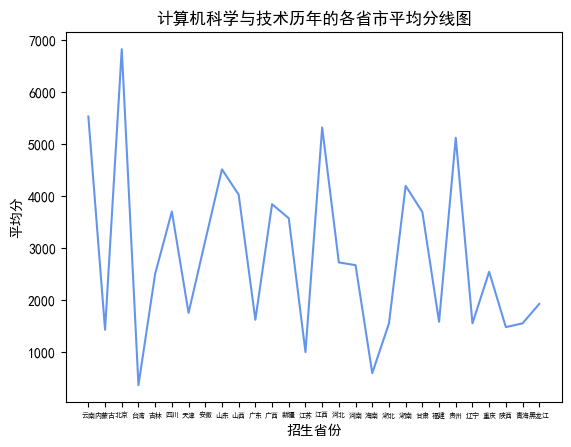

In [8]:
#initialize
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Prepare
x = admissiondf['省份']
#print(x)
y = admissiondf['平均分']
#print(y)

# Render
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=5)

#plt.figure(dpi=3000)
ax.set_title('计算机科学与技术历年的各省市平均分线图')
ax.set_xlabel('招生省份')
ax.set_ylabel('平均分')
ax.plot(x, y,color='cornflowerblue')
plt.savefig('计算机科学与技术历年的各省市平均分折线图.png')

plt.show()

##### 某专业某年各省市最低及最高分柱状图

### 以计算机科学与技术专业、2023年为例

#### 最低分：

In [12]:
#以计算机科学与技术专业为例
df['最低分'] = df['最低分'].astype('float64')
df['最高分'] = df['最高分'].astype('float64')
csdf=df[(df['专业']=='计算机科学与技术')&(df['年份']=='2023年')]
admissiondf1 = csdf.groupby('省份', as_index=False)['最低分'].sum()
admissiondf2 = csdf.groupby('省份', as_index=False)['最高分'].sum()
#a=list(admissiondf1['省份'])
admissiondf1

,省份,最低分
0,云南,489.0
1,北京,504.0
2,吉林,465.0
3,四川,549.0
4,天津,575.0
5,山东,578.0
6,山西,469.0
7,广西,468.0
8,新疆,404.0
9,河北,578.0


In [13]:
admissiondf2

,省份,最高分
0,云南,528.0
1,北京,525.0
2,吉林,477.0
3,四川,549.0
4,天津,589.0
5,山东,581.0
6,山西,491.0
7,广西,488.0
8,新疆,419.0
9,河北,583.0


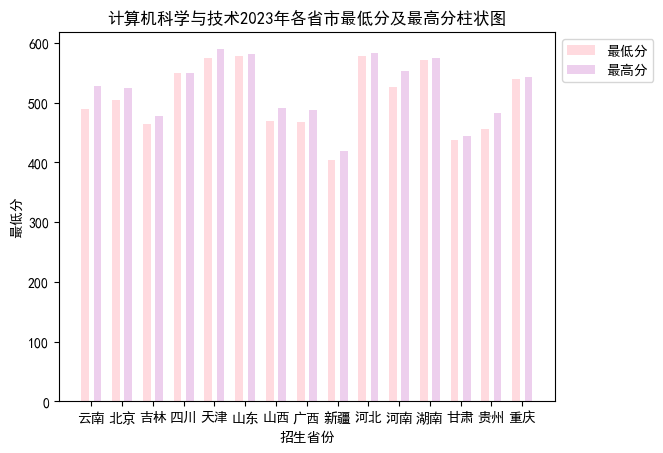

In [14]:
#initialize
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Prepare
x = np.arange(len(list(admissiondf1['省份'])))
y = [admissiondf1['最低分'],admissiondf2['最高分']]
#y2 = admissiondf2['最高分']
a=list(admissiondf1['省份'])


# Render
fig, ax = plt.subplots()
ax.set_title('计算机科学与技术2023年各省市最低分及最高分柱状图')
ax.set_xlabel('招生省份')
ax.set_ylabel('最低分')
ax.set_xticks(x)
ax.set_xticklabels(a)


width=0.2
low=ax.bar(x-width, y[0],width=0.25,align="center",color='lightpink',alpha=0.5,label='最低分')
hight=ax.bar(x+width, y[1],width=0.25,align="center",color='plum',alpha=0.5,label='最高分')
plt.legend(bbox_to_anchor=(1,1))

plt.savefig('计算机科学与技术2023年各省市最低分及最高分柱状图.png')
plt.show()

#### 最高分：

## 某专业某年各省市最低分、平均分、最高分的fill_between图

### 以计算机科学与技术专业、2023年为例

In [18]:
df['最低分'] = df['最低分'].astype('float64')
df['最高分'] = df['最高分'].astype('float64')
csdf=df[(df['专业']=='计算机科学与技术')&(df['年份']=='2023年')]
admissiondf3 = csdf.groupby('省份', as_index=False)['最低分'].sum()
admissiondf4 = csdf.groupby('省份', as_index=False)['最高分'].sum()
admissiondf3

,省份,最低分
0,云南,489.0
1,北京,504.0
2,吉林,465.0
3,四川,549.0
4,天津,575.0
5,山东,578.0
6,山西,469.0
7,广西,468.0
8,新疆,404.0
9,河北,578.0


In [19]:
admissiondf4

,省份,最高分
0,云南,528.0
1,北京,525.0
2,吉林,477.0
3,四川,549.0
4,天津,589.0
5,山东,581.0
6,山西,491.0
7,广西,488.0
8,新疆,419.0
9,河北,583.0


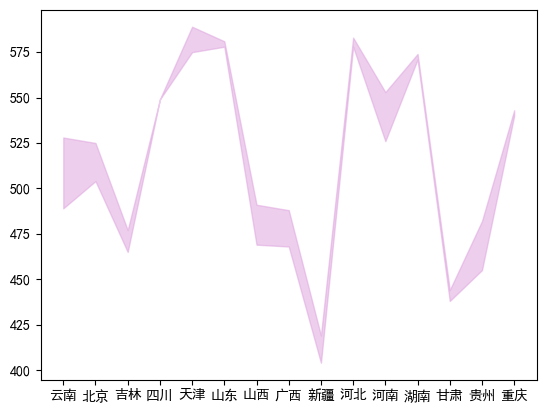

In [20]:
#initialize
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Prepare
x=admissiondf3['省份']
y=admissiondf3['最低分']
y2=admissiondf4['最高分']
#sum = admissiondf['计划人数'].sum()
#z=[tz/sum for tz in admissiondf['计划人数'] ]

# Render
#fig, ax = plt.subplots()
plt.fill_between(x,y,y2,color='plum',alpha=0.5)

#ax.pie(z,labels=x, autopct='%1.1f%%', startangle=140)
plt.savefig('计算机科学与技术专业2023年各省市最低分、平均分、最高分的fill_between图.png')
#plt.color(#FF7F50)
plt.show()